# Задание 1
Система задана как на рисунке ниже - со слайдов лекций. Центр масс первой линки на расстоянии $d_1$ = $\frac{l_1}{2}$

Центр масс второй линки на расстоянии $q2$ от фрейма второй линки

Систему составлял по ДХ

In [215]:
import sympy as sym
import numpy as np
def Rx_sym(q):
    T = sym.Matrix([[1,         0,          0, 0],
                  [0, sym.cos(q), -sym.sin(q), 0],
                  [0, sym.sin(q),  sym.cos(q), 0],
                  [0,         0,          0, 1]])
    return T

def Ry_sym(q):
    T = sym.Matrix([[ sym.cos(q), 0, sym.sin(q), 0],
                  [         0, 1,         0, 0],
                  [-sym.sin(q), 0, sym.cos(q), 0],
                  [         0, 0,         0, 1]])
    return T


def Rz_sym(q):
    T = sym.Matrix([[sym.cos(q), -sym.sin(q), 0, 0],
                  [sym.sin(q),  sym.cos(q), 0, 0],
                  [        0,          0, 1, 0],
                  [        0,          0, 0, 1]])
    return T


def Tx_sym(x):
    T = sym.Matrix([[1, 0, 0, x],
                  [0, 1, 0, 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
    return T


def Ty_sym(y):
    T = sym.Matrix([[1, 0, 0, 0],
                  [0, 1, 0, y],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
    return T


def Tz_sym(z):
    T = sym.Matrix([[1, 0, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 1, z],
                  [0, 0, 0, 1]])
    return T


def dRz(q):
    T = np.array([[-np.sin(q), -np.cos(q), 0, 0],
                  [np.cos(q),  -np.sin(q), 0, 0],
                  [        0,          0, 0, 0],
                  [        0,          0, 0, 0]], dtype=float)
    return T

def dRx(q):
    T = np.array([[0,         0,          0, 0],
                  [0, -np.sin(q), -np.cos(q), 0],
                  [0, np.cos(q),  -np.sin(q), 0],
                  [0,         0,          0, 0]], dtype=float)
    return T

def dRy(q):
    T = np.array([[ -np.sin(q), 0, np.cos(q), 0],
                  [         0, 0,         0, 0],
                  [-np.cos(q), 0, -np.sin(q), 0],
                  [         0, 0,         0, 0]], dtype=float)
    return T

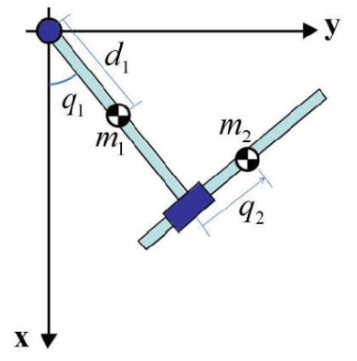

In [216]:
def DH(d, theta, a, alpha):
    A = Rz_sym(theta) @ Tz_sym(d) @ Tx_sym(a) @ Rx_sym(alpha)
    return A

In [217]:
import matplotlib.pyplot as plt
np.set_printoptions(precision=10, suppress=True)
# robot parameters
l1_sym, l2_sym, lc1_sym, lc2_sym = sym.symbols('l_1, l_2, d1, l_{c2}')
# I1_sym, I2_sym = sym.symbols('I_1, I_2')

I_xx1, I_yy1, I_zz1 = sym.symbols('I_{xx1}, I_{yy1}, I_{zz1}')
I_xx2, I_yy2, I_zz2 = sym.symbols('I_{xx2}, I_{yy2}, I_{zz2}')
I1_sym = sym.Matrix([[I_xx1, 0, 0],
                     [0, I_yy1, 0],
                     [0,0, I_zz1]])

I2_sym = sym.Matrix([[I_xx2, 0, 0],
                     [0, I_yy2, 0],
                     [0,0, I_zz2]])

m1_sym, m2_sym = sym.symbols('m_1, m_2')
t = sym.symbols('t')
q1 = sym.Function('q1')(t)
q2 = sym.Function('q2')(t)
dq1 = sym.diff(q1, t)
dq2 = sym.diff(q2, t)
dq_start = sym.Matrix([dq1, dq2])
g = sym.Symbol('g')

params = {'l1': l1_sym,
          'l2': l2_sym,
          'd1': lc1_sym}
gen_coords = {'q1': np.pi/8,
              'q2': 0.3}

q_0 = sym.Matrix([gen_coords['q1'],gen_coords['q2']])

In [218]:
d_p= np.array([0, params['l2']])
th_p = np.array([0, 0])
a_p = np.array([params['d1'], 0])
al_p = np.array([-np.pi/2, 0])
q_type = np.array(["R", "P"])

In [219]:
def FK(q_cor, q_type):
    Matrix = sym.eye(4)

    for i, (q, j_t) in enumerate(zip(q_cor, q_type)):
      if j_t =="R":
          Matrix = Matrix @ DH(d_p[i], th_p[i]+q, a_p[i]*2, al_p[i])
      elif j_t == "P":
          Matrix = Matrix @ DH(d_p[i]/2+q, th_p[i], a_p[i], al_p[i])

    return Matrix

In [220]:
from IPython.display import display
q_start = sym.Matrix([q1, q2])
num_coors = 1
FK0 = FK(q_start[:num_coors ], q_type[:num_coors ])
FK0.simplify()
FK0 = sym.nsimplify(FK0, tolerance=1e-10, rational=True)
display(FK0)

Matrix([
[cos(q1(t)),  0, -sin(q1(t)), 2*d1*cos(q1(t))],
[sin(q1(t)),  0,  cos(q1(t)), 2*d1*sin(q1(t))],
[         0, -1,           0,               0],
[         0,  0,           0,               1]])

In [221]:
def FK_com(q_cor, q_type):
    Matrix = sym.eye(4)

    Matrix = FK(q_cor[:-1], q_type[:-1])

    joint_num = len(q_cor)-1
    if joint_num <0:
      return Matrix
    if q_type[-1] =="R":
        Matrix = Matrix @ DH(d_p[joint_num], th_p[joint_num]+q_cor[-1], a_p[joint_num], 0) # the rotation after does not matter
    elif q_type[-1] == "P":
        Matrix = Matrix @ DH(q_cor[-1], 0, 0, 0) # everything after translating to the com does not matter


    return Matrix

In [222]:
num_coors = 1
FK0 = FK_com(q_start[:num_coors ], q_type[:num_coors ])
FK0.simplify()
FK0 = sym.nsimplify(FK0, tolerance=1e-10, rational=True)
display(FK0)

Matrix([
[cos(q1(t)), -sin(q1(t)), 0, d1*cos(q1(t))],
[sin(q1(t)),  cos(q1(t)), 0, d1*sin(q1(t))],
[         0,           0, 1,             0],
[         0,           0, 0,             1]])

In [223]:
import numpy as np
def j_geometric(q_coords, q_type):
  """
  The function returns the Jacobian (6x2) calculated geometrically
  """
  pe = FK(q_coords, q_type)[:3, 3].T # end-effector coordinates

  J = sym.zeros(6, 2)
  for i in range(len(q_coords)):
    if q_type[i] == "R":
      pi = FK(q_coords[:i], q_type)[:3, 3].T
      z = FK(q_coords[:i], q_type)[:3, 2].T
      Jp = z.cross(pe-pi)
      J[0:3,i] = Jp.T
      J[3:,i] = z.T
    elif q_type[i] == "P":
      z = FK(q_coords[:i], q_type)[:3, 2].T
      J[0:3,i] = z.T

  return J

#points = get_points(np.array([0,0,0]))
J_gm = sym.nsimplify(j_geometric(q_start, q_type), tolerance=1e-10,rational=True)
J_gm

Matrix([
[-2*d1*sin(q1(t)) - (l_2/2 + q2(t))*cos(q1(t)), -sin(q1(t))],
[ 2*d1*cos(q1(t)) - (l_2/2 + q2(t))*sin(q1(t)),  cos(q1(t))],
[                                            0,           0],
[                                            0,           0],
[                                            0,           0],
[                                            1,           0]])

In [224]:
import numpy as np
def j_geometric_com(q_coords, q_type):
  """
  The function returns the Jacobian (6x2) calculated geometrically
  """
  pe = FK_com(q_coords, q_type)[:3, 3].T # end-effector coordinates

  J = sym.zeros(6, 2)
  for i in range(len(q_coords)):
    if q_type[i] == "R":
      pi = FK(q_coords[:i], q_type)[:3, 3].T
      z = FK(q_coords[:i], q_type)[:3, 2].T
      Jp = z.cross(pe-pi)
      J[0:3,i] = Jp.T
      J[3:,i] = z.T
    elif q_type[i] == "P":
      z = FK_com(q_coords[:i+1], q_type)[:3, 2].T
      display(sym.nsimplify(FK_com(q_coords[:i+1], q_type), tolerance=1e-10,rational=True))
      J[0:3,i] = z.T

  return J

J1 = sym.nsimplify(j_geometric_com(q_start[:1], q_type[:1]), tolerance=1e-10,rational=True)
J2 = sym.nsimplify(j_geometric_com(q_start, q_type), tolerance=1e-10,rational=True)
Rcom1 =  FK_com(q_start[:1], q_type[:1])[:3, :3]
Rcom2 =  FK_com(q_start, q_type)[:3, :3]

Matrix([
[cos(q1(t)),  0, -sin(q1(t)), 2*d1*cos(q1(t)) - q2(t)*sin(q1(t))],
[sin(q1(t)),  0,  cos(q1(t)), 2*d1*sin(q1(t)) + q2(t)*cos(q1(t))],
[         0, -1,           0,                                  0],
[         0,  0,           0,                                  1]])

In [225]:
sym.nsimplify(FK_com(q_start, q_type), tolerance=1e-10,rational=True)

Matrix([
[cos(q1(t)),  0, -sin(q1(t)), 2*d1*cos(q1(t)) - q2(t)*sin(q1(t))],
[sin(q1(t)),  0,  cos(q1(t)), 2*d1*sin(q1(t)) + q2(t)*cos(q1(t))],
[         0, -1,           0,                                  0],
[         0,  0,           0,                                  1]])

In [226]:
J1

Matrix([
[-d1*sin(q1(t)), 0],
[ d1*cos(q1(t)), 0],
[             0, 0],
[             0, 0],
[             0, 0],
[             1, 0]])

In [227]:
J2

Matrix([
[-2*d1*sin(q1(t)) - q2(t)*cos(q1(t)), -sin(q1(t))],
[ 2*d1*cos(q1(t)) - q2(t)*sin(q1(t)),  cos(q1(t))],
[                                  0,           0],
[                                  0,           0],
[                                  0,           0],
[                                  1,           0]])

In [228]:
J1v, J1w = J1[:3, :], J1[3:, :]
J2v, J2w = J2[:3, :], J2[3:, :]

In [229]:
Mcom1 = m1_sym * J1v.T @ J1v + J1w.T @ Rcom1 @ I1_sym @ Rcom1.T @ J1w
Mcom1 = sym.nsimplify(Mcom1, tolerance=1e-10,rational=True)
Mcom1 = Mcom1.simplify()
Mcom1

Matrix([
[I_{zz1} + d1**2*m_1, 0],
[                  0, 0]])

In [230]:
Mcom2 = m2_sym * J2v.T @ J2v + J2w.T @ Rcom2 @ I2_sym @ Rcom2.T @ J2w
Mcom2 = sym.nsimplify(Mcom2, tolerance=1e-10,rational=True)
Mcom2 = Mcom2.simplify()
Mcom2

Matrix([
[I_{yy2} + 4*d1**2*m_2 + m_2*q2(t)**2, 2*d1*m_2],
[                            2*d1*m_2,      m_2]])

In [231]:
M = Mcom1 + Mcom2
M = sym.nsimplify(M, tolerance=1e-10,rational=True)
M

Matrix([
[I_{yy2} + I_{zz1} + d1**2*m_1 + 4*d1**2*m_2 + m_2*q2(t)**2, 2*d1*m_2],
[                                                  2*d1*m_2,      m_2]])

In [232]:
dim = len(q_start)

coriolis = sym.zeros(dim, dim)
for i in range(dim):
  for j in range(dim):
    for k in range(dim):
      coriolis[i, j] += 1/2*(sym.diff(M[i, j], q_start[k])+sym.diff(M[i, k], q_start[j])-sym.diff(M[j, k], q_start[i])) * dq_start[k]

In [233]:
coriolis

Matrix([
[ 1.0*m_2*q2(t)*Derivative(q2(t), t), 1.0*m_2*q2(t)*Derivative(q1(t), t)],
[-1.0*m_2*q2(t)*Derivative(q1(t), t),                                  0]])

In [234]:
g0 = sym.Matrix([g, 0, 0])
gravity = -J1v.T @ g0 * m1_sym - J2v.T @ g0 * m2_sym
gravity

Matrix([
[d1*g*m_1*sin(q1(t)) - g*m_2*(-2*d1*sin(q1(t)) - q2(t)*cos(q1(t)))],
[                                                 g*m_2*sin(q1(t))]])

Итоговое решение в необходимом формате
Прошу заметить, что $2d_1 = l_1$ из условия.
Помимо этого я задавал систему через ДХ, из-за чего при переходе во фрейм второй линки ось Z должна быть направлена вдоль призматического шарнира, что возможно лишь при повороте фреймов вокруг оси x при переходе от 1 к 2. Из-за этого матрица поворотов для центра масс 2 линки не является простым поворотом вокруг оси Z, из-за чего у меня вместо $I_{zz2}$ вылезла инерция по y.
В случае необходимости я готов обсудить решение

In [235]:
tau = M @ q_start + coriolis @ q_start + gravity
tau

Matrix([
[d1*g*m_1*sin(q1(t)) + 2*d1*m_2*q2(t) - g*m_2*(-2*d1*sin(q1(t)) - q2(t)*cos(q1(t))) + 1.0*m_2*q1(t)*q2(t)*Derivative(q2(t), t) + 1.0*m_2*q2(t)**2*Derivative(q1(t), t) + (I_{yy2} + I_{zz1} + d1**2*m_1 + 4*d1**2*m_2 + m_2*q2(t)**2)*q1(t)],
[                                                                                                                                                  2*d1*m_2*q1(t) + g*m_2*sin(q1(t)) - 1.0*m_2*q1(t)*q2(t)*Derivative(q1(t), t) + m_2*q2(t)]])

# Задание 2
Проверка кососимметричности


In [241]:
sym.diff(M, t)

Matrix([
[2*m_2*q2(t)*Derivative(q2(t), t), 0],
[                               0, 0]])

In [242]:
2*coriolis

Matrix([
[ 2.0*m_2*q2(t)*Derivative(q2(t), t), 2.0*m_2*q2(t)*Derivative(q1(t), t)],
[-2.0*m_2*q2(t)*Derivative(q1(t), t),                                  0]])

In [243]:
A = sym.diff(M, t) - 2*coriolis
A

Matrix([
[                                 0, -2.0*m_2*q2(t)*Derivative(q1(t), t)],
[2.0*m_2*q2(t)*Derivative(q1(t), t),                                   0]])

In [244]:
A.T + A

Matrix([
[0, 0],
[0, 0]])